In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to display matplotlib plots directly in the notebook interface
%matplotlib inline 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

## Data Pre-Processing and Analysis

In [2]:
Fraud = pd.read_csv(r"F:\Intershala\Accredian\Fraud.csv")

In [3]:
Fraud.head(150)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,1,PAYMENT,3026.98,C1909398279,31139.00,28112.02,M1632670136,0.00,0.00,0,0
146,1,CASH_OUT,467177.03,C1338905451,28112.02,0.00,C1170794006,975121.00,22190.99,0,0
147,1,DEBIT,3875.99,C1252540239,259138.00,255262.01,C1509514333,608925.82,2415.16,0,0
148,1,PAYMENT,2148.89,C1136005694,31213.00,29064.11,M638486177,0.00,0.00,0,0


In [4]:
Fraud.tail(150)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362470,731,TRANSFER,31887.18,C1764583028,31887.18,0.0,C252274322,0.00,0.00,1,0
6362471,731,CASH_OUT,31887.18,C30896720,31887.18,0.0,C1159359491,4584085.52,4615972.70,1,0
6362472,731,TRANSFER,147186.94,C1013069669,147186.94,0.0,C1655602731,0.00,0.00,1,0
6362473,731,CASH_OUT,147186.94,C1225675649,147186.94,0.0,C1599626479,15982.05,163168.99,1,0
6362474,731,TRANSFER,302227.56,C648990331,302227.56,0.0,C1204258741,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
Fraud.shape

(6362620, 11)

In [7]:
Fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

 There are no no null values despite being a big dataset.

### - Identifying Outliers
    - Used Boxplot in this case

<Axes: >

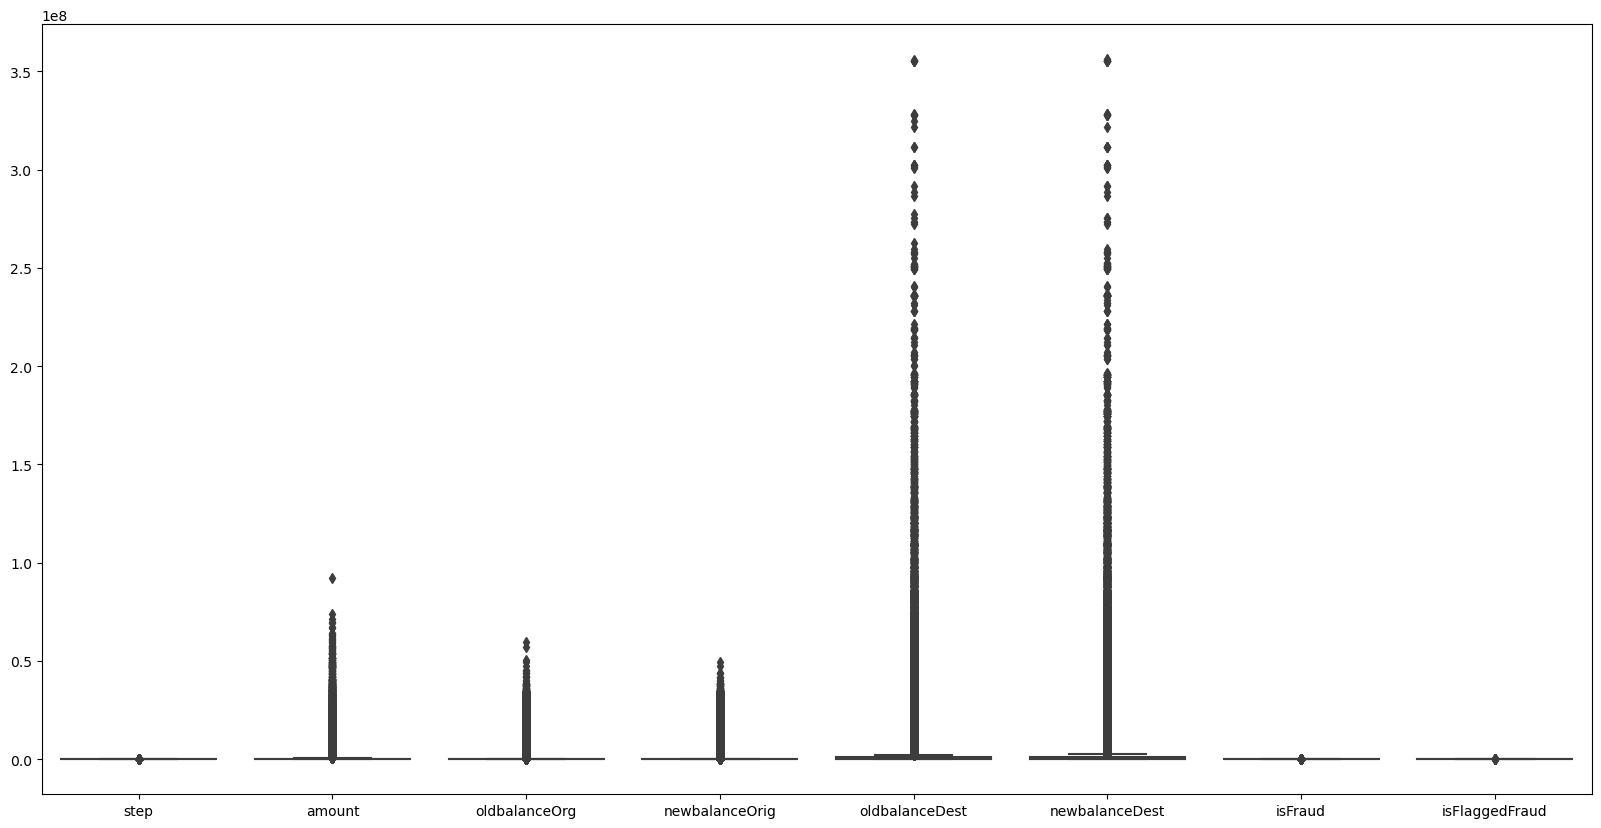

In [8]:
sns.boxplot(data=Fraud)

<Axes: >

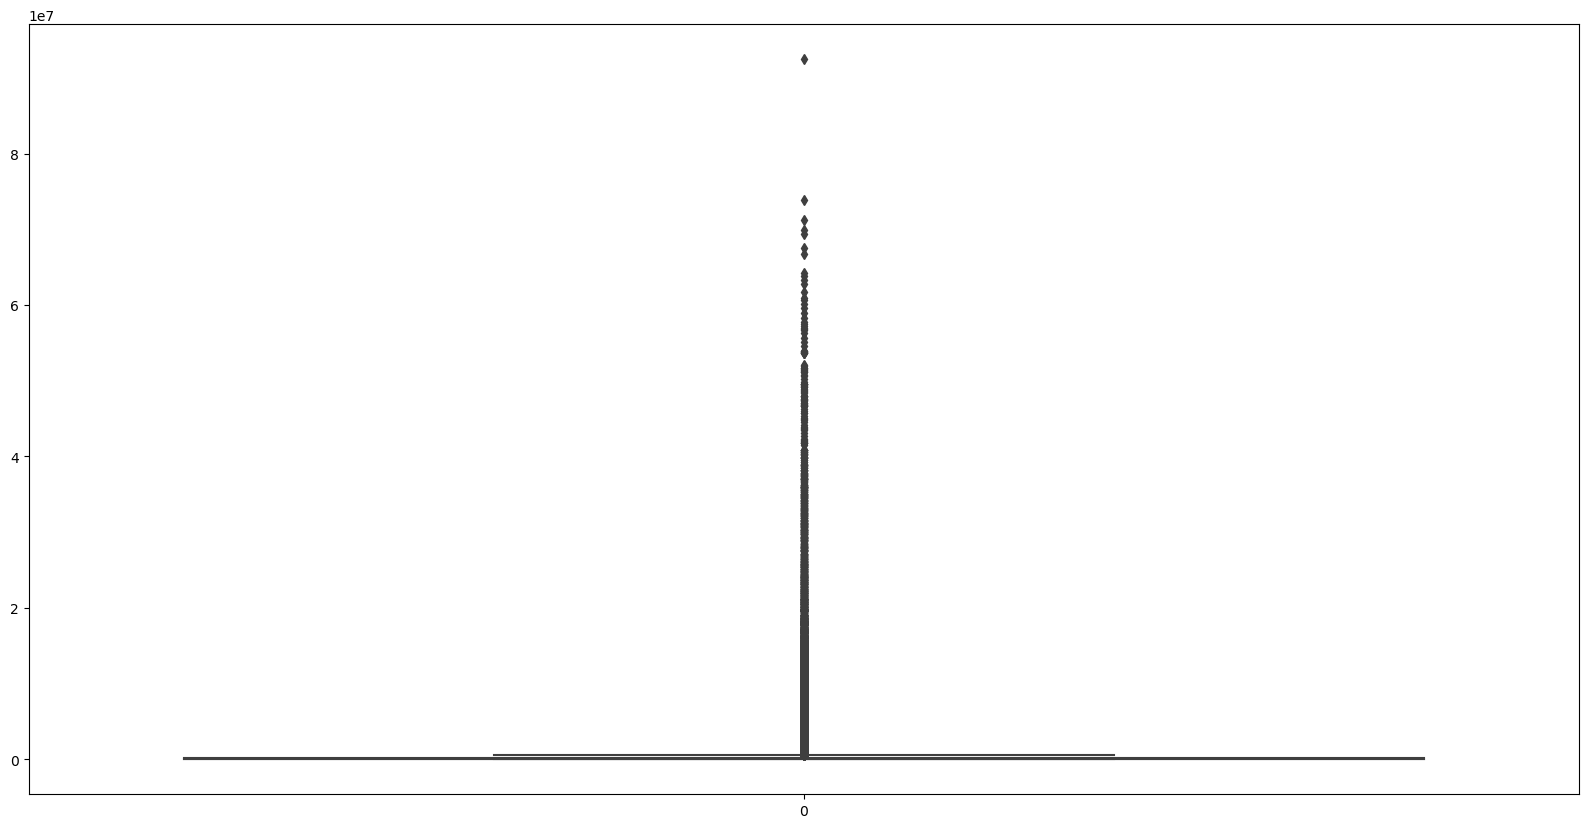

In [9]:
sns.boxplot(data=Fraud['amount'])

<Axes: >

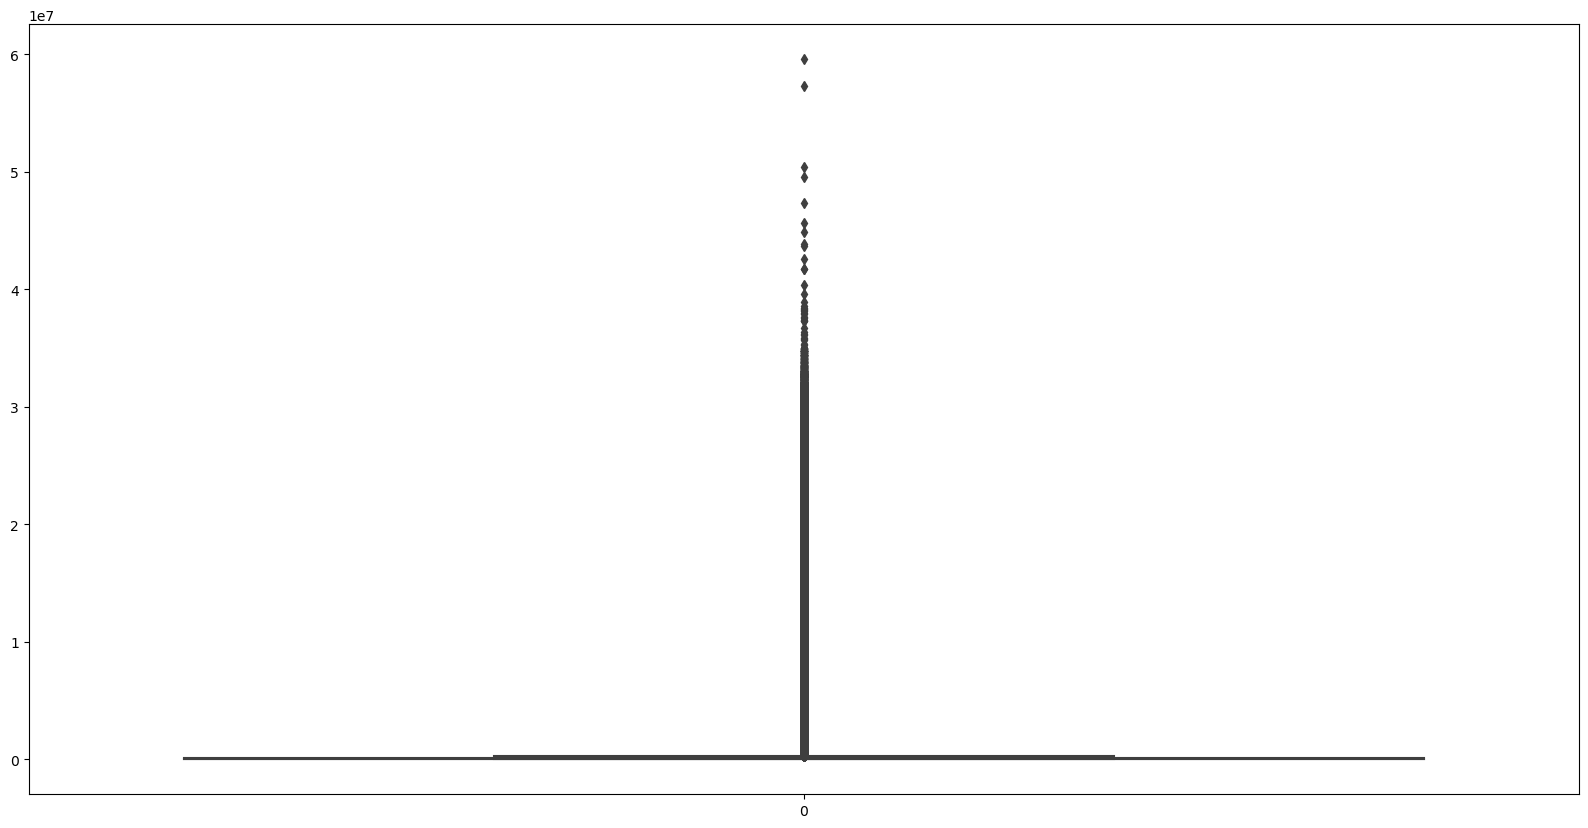

In [10]:
sns.boxplot(data=Fraud['oldbalanceOrg'])

<Axes: >

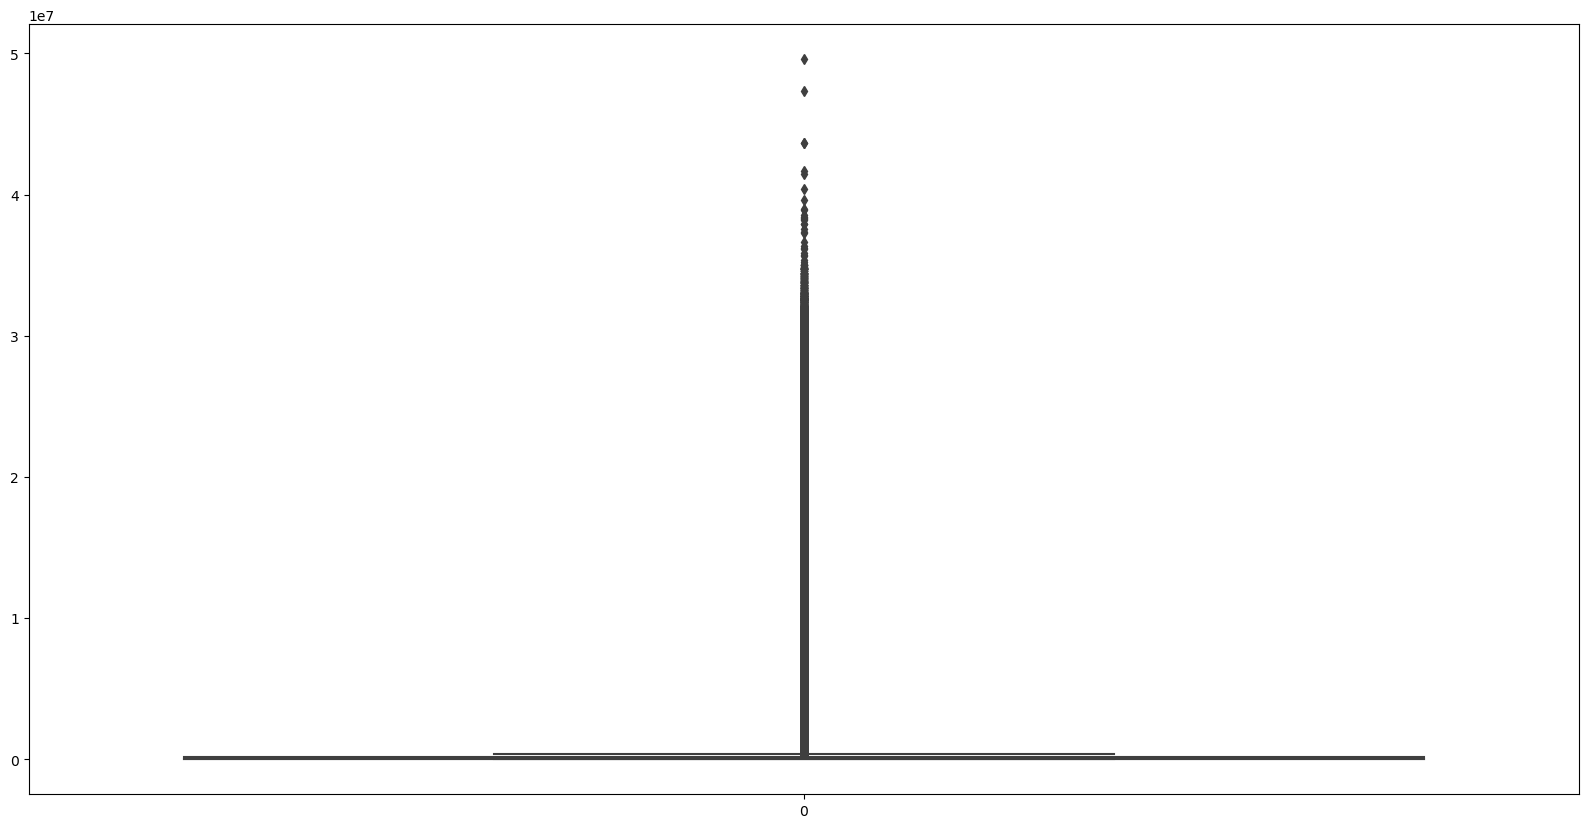

In [11]:
sns.boxplot(data=Fraud['newbalanceOrig'])

<Axes: >

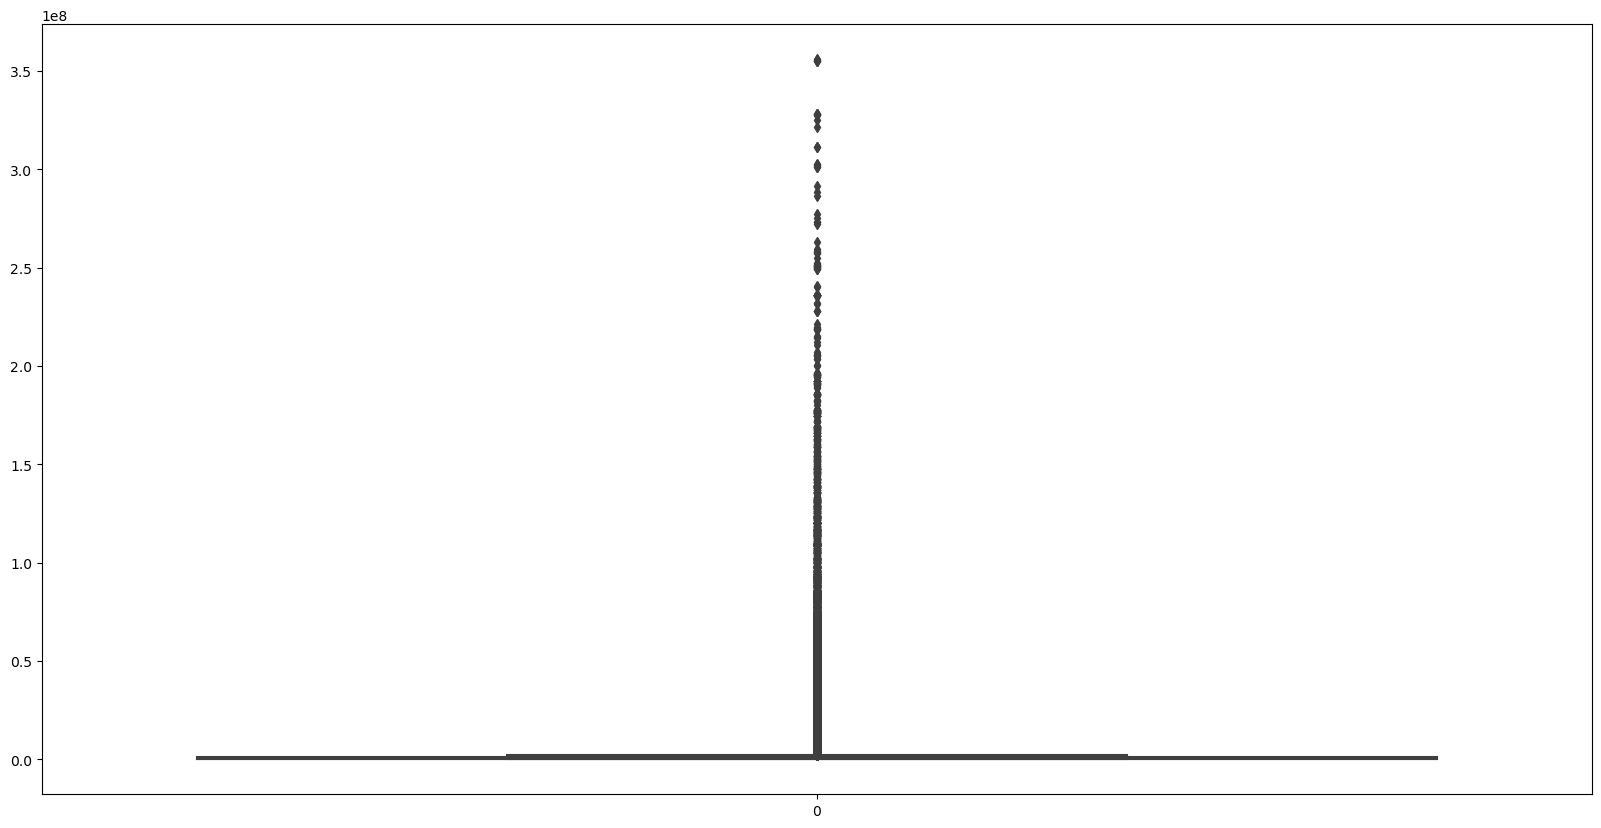

In [12]:
sns.boxplot(data=Fraud['oldbalanceDest'])

<Axes: >

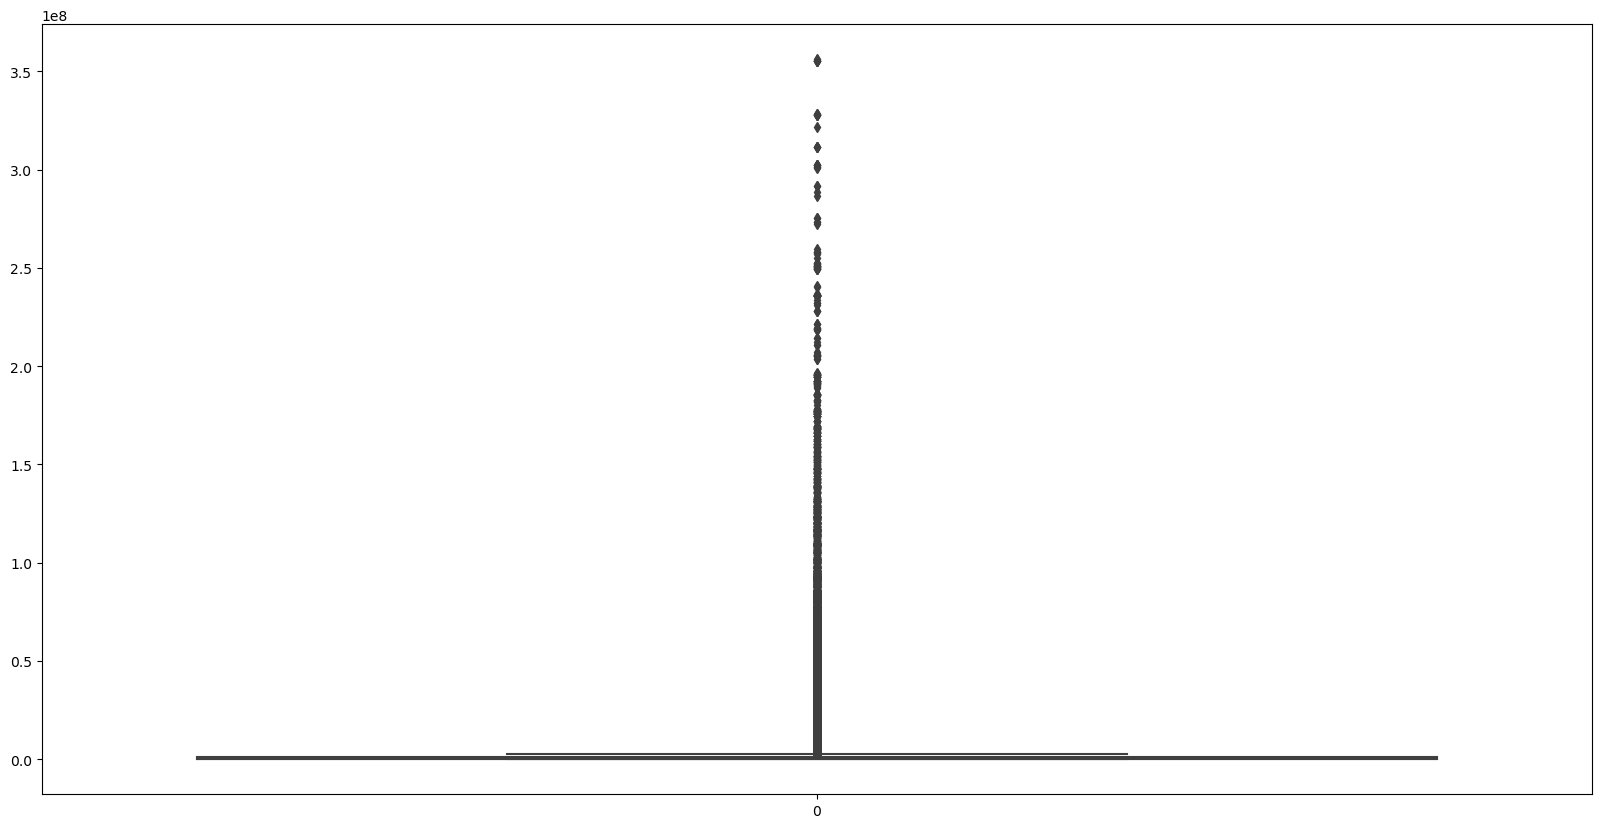

In [13]:
sns.boxplot(data=Fraud['newbalanceDest'])

## - Treating the Outliers

 __Treating outliers is important because they can significantly impact the results of statistical analyses and machine learning models.__

In [14]:
def get_whiskers(col_name):
        Q1 = Fraud[col_name].quantile(0.25)   # for 1 column compute Q1
        Q3 = Fraud[col_name].quantile(0.75)   # for 1 column compute Q3 
        IQR = Q3-Q1   # for 1 column compute IQR
        UB = Q3 + 1.5 * IQR       # for 1 column compute UPPER BOUND\LIMIT
        LB = Q1 - 1.5 * IQR       # for 1 column compute LOWER BOUND\LIMIT
        return UB, LB

In [15]:
for col_name in Fraud:    #col_name = column Name 
    if Fraud[col_name].dtype in ('int','float'):    #df[i] = every column will select int and float valules only
        LB, UB = get_whiskers(col_name)    # 
        Fraud[col_name].clip(upper = UB , lower = LB , inplace = True)# the clip method , limit the values in the current column to be within the specified upper (UB) and lower (LB) bounds

In [16]:
from sklearn.preprocessing import LabelEncoder

for col in Fraud.columns:
    if Fraud[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(Fraud[col].values))
        Fraud[col] = lbl.transform(Fraud[col].values)

In [17]:
Fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


* __Correlation Heatmap__

<Axes: >

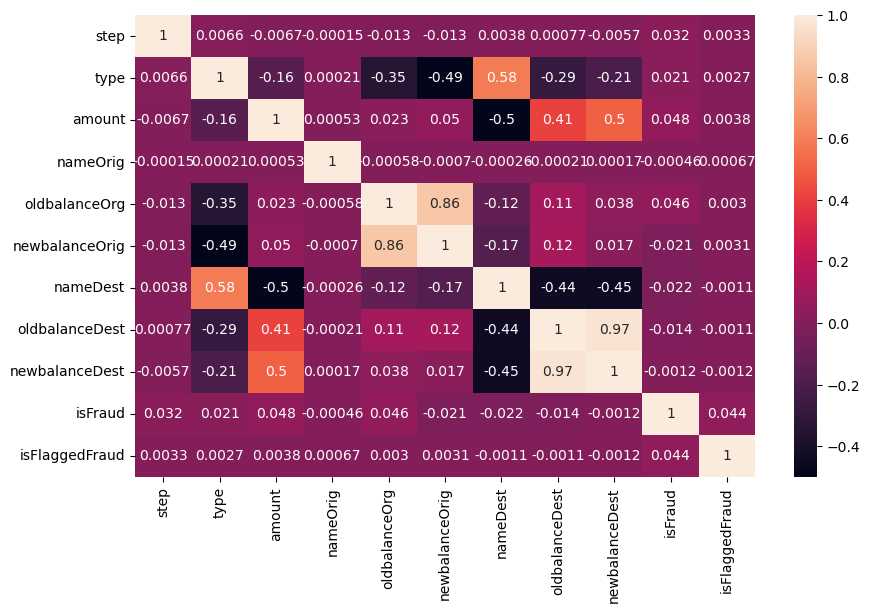

In [18]:
corr=Fraud.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

* __VIF (VARIANCE INFLATION FACTOR)__ 

In [19]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) 
    for i in range(df.shape[1])]
    return(vif)

cal_vif(Fraud)

,variables,VIF
0,step,3.074162
1,type,5.340388
2,amount,3.017503
3,nameOrig,3.112559
4,oldbalanceOrg,6.290525
5,newbalanceOrig,7.313279
6,nameDest,4.198199
7,oldbalanceDest,34.207066
8,newbalanceDest,38.183047
9,isFraud,1.025404


We can see that oldbalanceDest and newbalanceDest have too high VIF thus they are highly correlated. Also nameDest is connected to nameOrig.


Thus combine these pairs of collinear attributes and drop the individual ones.

In [20]:
Fraud['Actual_amount_orig'] = Fraud.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
Fraud['Actual_amount_dest'] = Fraud.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
Fraud['TransactionPath'] = Fraud.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

In [21]:
Fraud.drop(['oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','step','nameOrig','nameDest'],axis=1, inplace=True)

In [22]:
cal_vif(Fraud)

,variables,VIF
0,type,2.859519
1,amount,2.323191
2,isFraud,1.018565
3,isFlaggedFraud,1.002008
4,Actual_amount_orig,1.431167
5,Actual_amount_dest,1.983253
6,TransactionPath,3.028186


<Axes: >

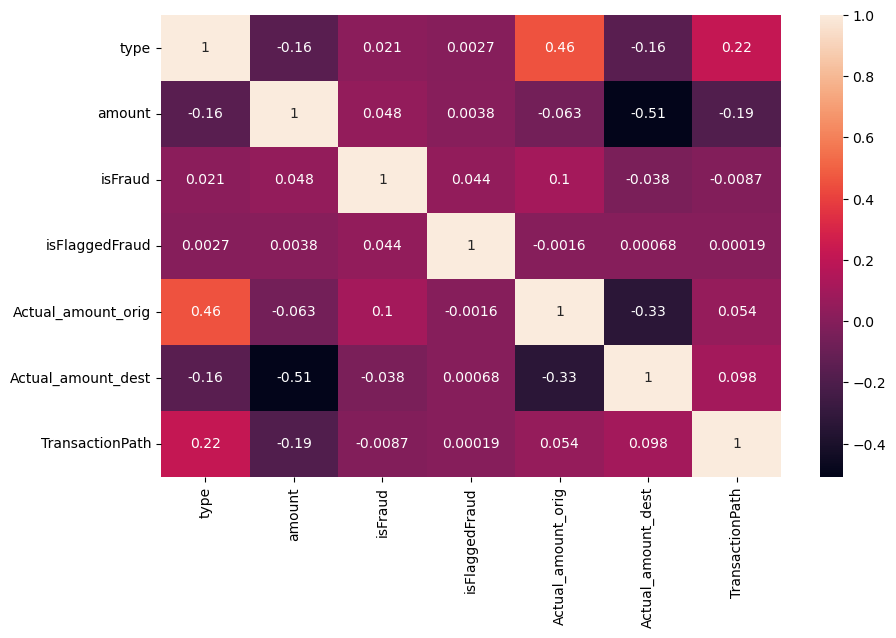

In [23]:
corr=Fraud.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

* __Number of GENUINE and FRAUD TRANSACTIONS__

In [24]:
genuine_transaction = len(Fraud[Fraud.isFraud == 0])
fraud_transaction = len(Fraud[Fraud.isFraud == 1])

genuine_transaction_percent = (genuine_transaction / (fraud_transaction + genuine_transaction)) * 100
fraud_transaction_percent = (fraud_transaction / (fraud_transaction + genuine_transaction)) * 100

print("Number of Legit transactions: ", genuine_transaction)
print("Number of Fraud transactions: ", fraud_transaction)
print("Percentage of Legit transactions: {:.4f} %".format(genuine_transaction_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_transaction_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


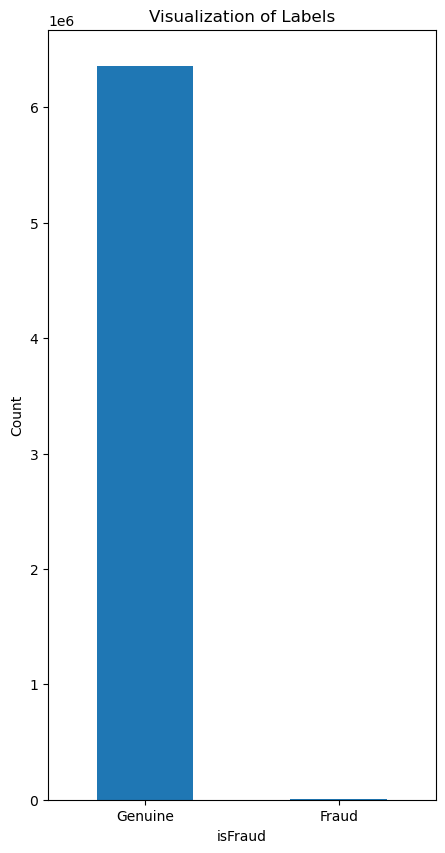

In [25]:
plt.figure(figsize=(5,10))
labels = ["Genuine", "Fraud"]
count_classes = Fraud.value_counts(Fraud['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

# Model Building

####  Normalising the AMOUNT

In [27]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
Fraud['Normalized_Amount']= SC.fit_transform(Fraud['amount'].values.reshape(-1,1))
Fraud.drop(['amount'],axis=1, inplace=True)

In [28]:
X = Fraud.drop(['isFraud'],axis=1)
Y = Fraud['isFraud']

#### Train - Test Split

In [29]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.3,random_state=15)
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)

Shape of X_train : (4453834, 6)
Shape of X_test : (1908786, 6)


* __MODEL TRANING and EVALUATION__

In [30]:
#Decision Tree

DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

Y_Pred = DT.predict(X_test)
DT_Score  = DT.score(X_test,Y_test)*100

In [31]:
# Random Forest 
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,Y_train)

Y_Pred_RF = RF.predict(X_test)
RF_Score = RF.score(X_test,Y_test)*100

In [32]:
print("Decision Tree Score: ", DT_Score)
print("Random Forest Score: ", RF_Score)

Decision Tree Score:  99.91444824092382
Random Forest Score:  99.95085881811791


In [33]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_Pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("*****************************")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_Pred_RF).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')


TP,FP,TN,FN - Decision Tree
True Positives: 1667
False Positives: 873
True Negatives: 1905486
False Negatives: 760
*****************************
TP,FP,TN,FN - Random Forest
True Positives: 1650
False Positives: 161
True Negatives: 1906198


####
TP(Decision Tree) ~ TP(Random Forest) 
FP(Decision Tree) >> FP(Random Forest)- Random Forest is BETTER
TN(Decision Tree) < TN(Random Forest) - Random Forest is BETTER
FN(Decision Tree) ~ FN(Random Forest)

From above, we can say the Random Forest suit better in this case

### Confusion Matrix

In [34]:
# confusion matrix - DT

confusion_matrix_DT = confusion_matrix(Y_test, Y_Pred.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_DT)

print("*******************************")

# confusion matrix - RF

confusion_matrix_RF = confusion_matrix(Y_test, Y_Pred_RF.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_RF)

Confusion Matrix - Decision Tree
[[1905486     873]
 [    760    1667]]
*******************************
Confusion Matrix - Random Forest
[[1906198     161]
 [    777    1650]]


### Classification Report

In [35]:

classification_report_DT = classification_report(Y_test, Y_Pred)
print("Classification Report - Decision Tree")
print(classification_report_DT)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_RF = classification_report(Y_test, Y_Pred_RF)
print("Classification Report - Random Forest")
print(classification_report_RF)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906359
           1       0.66      0.69      0.67      2427

    accuracy                           1.00   1908786
   macro avg       0.83      0.84      0.84   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906359
           1       0.91      0.68      0.78      2427

    accuracy                           1.00   1908786
   macro avg       0.96      0.84      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786



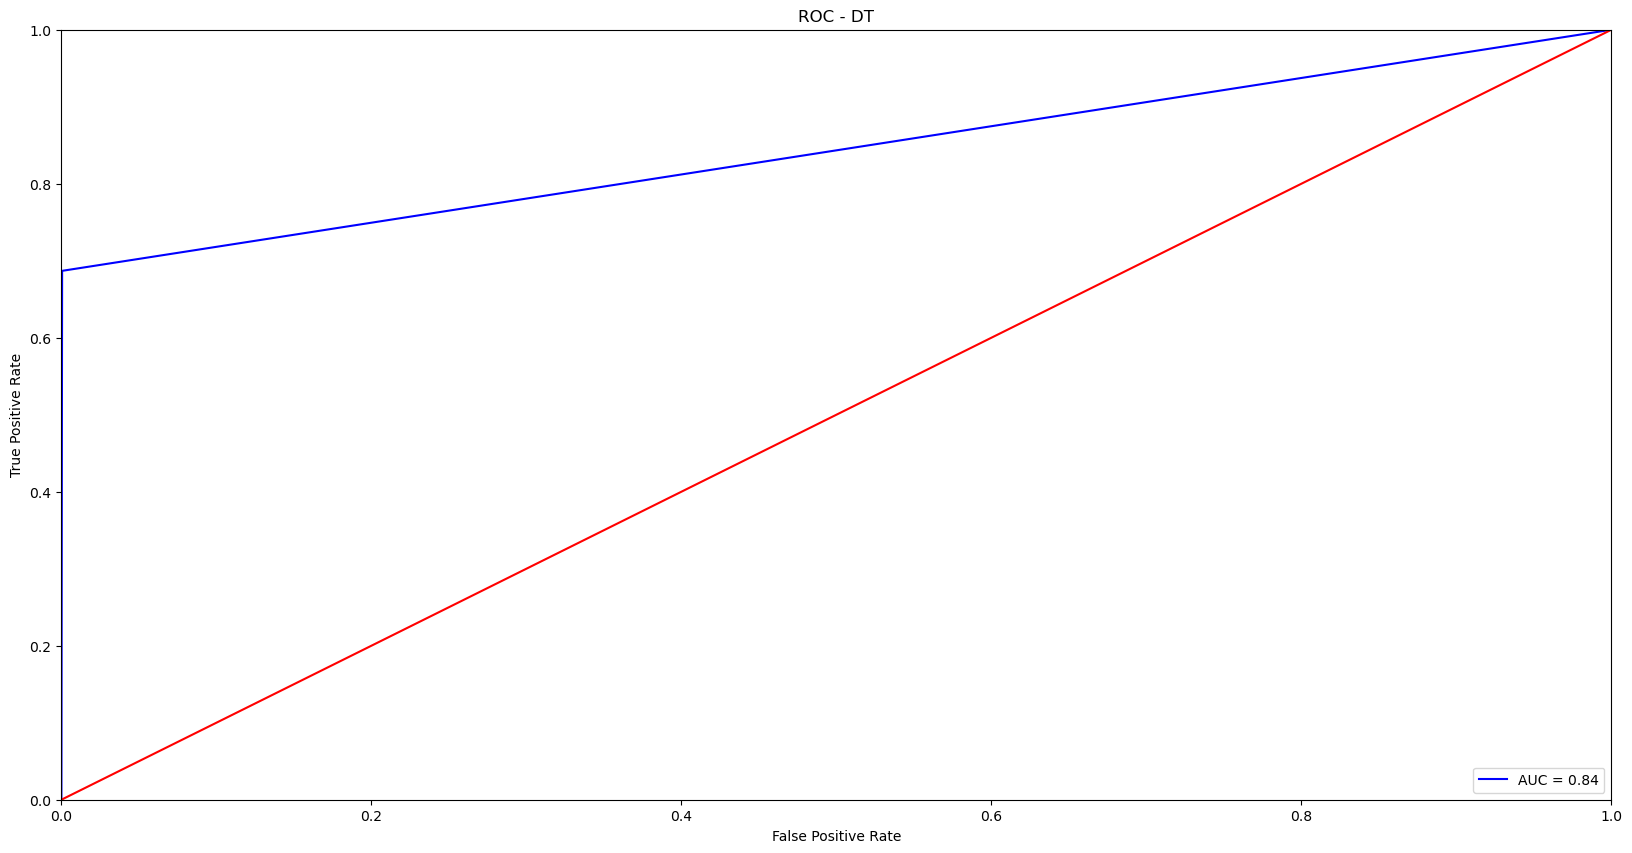

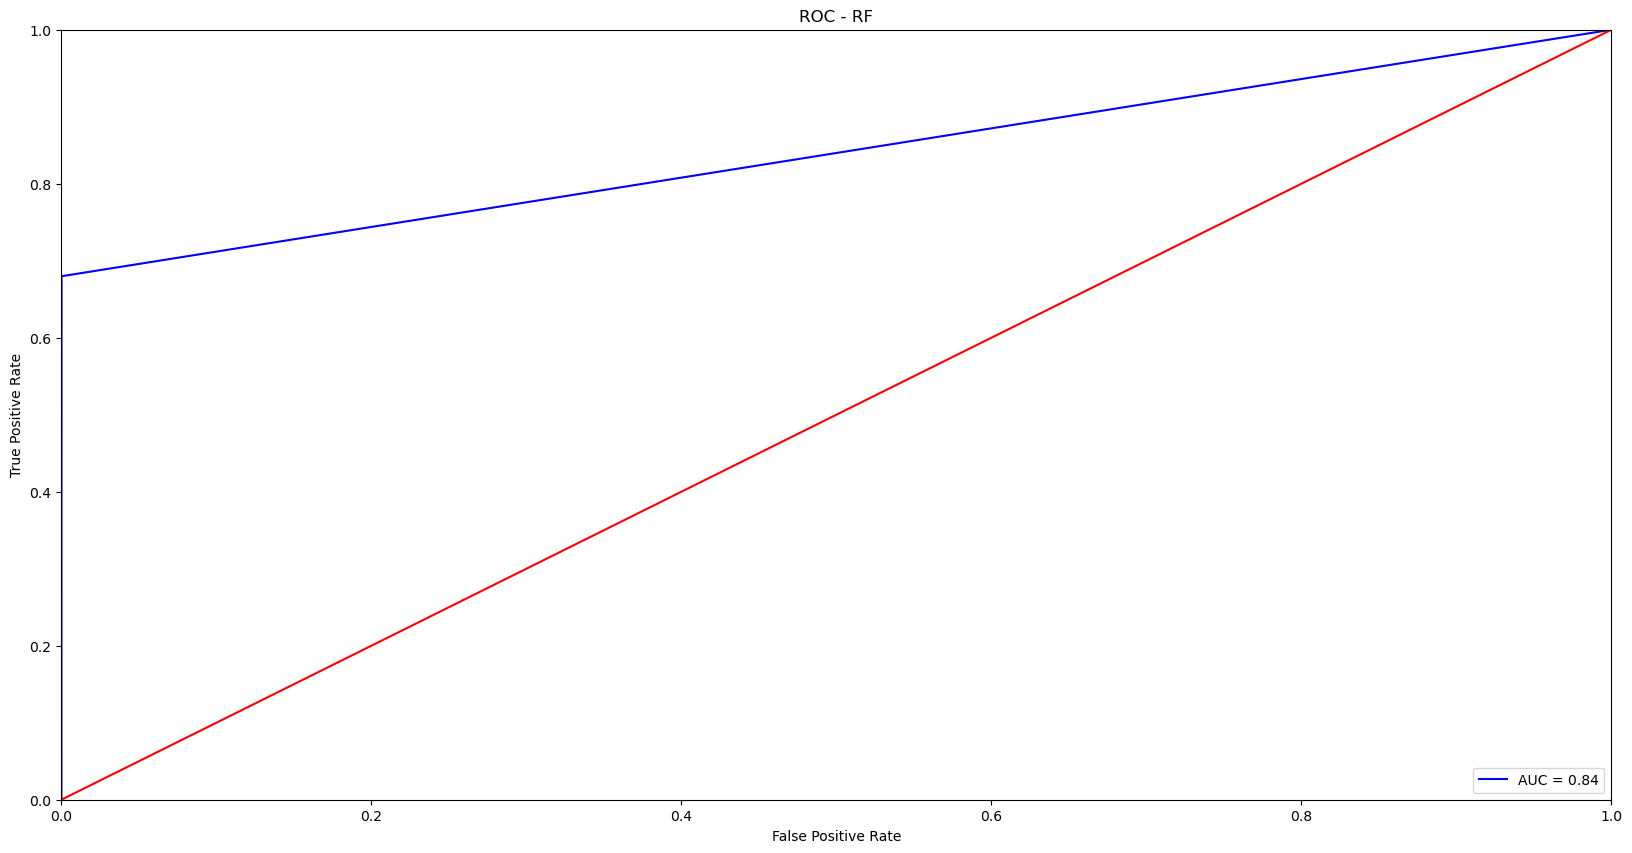

In [37]:
import sklearn.metrics as metrics

# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_Pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_Pred_RF)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


* __Both Random Forest and Decision Tree models show equal accuracy, but Random Forest exhibits higher precision__

* __In fraud detection models, precision is crucial as it emphasizes the accurate identification of fraud cases__

* __This is significant because precision focuses on correctly predicting fraud while minimizing false positives. In fraud detection, the priority is catching actual fraud (true positives) and avoiding misclassifying legitimate transactions as fraudulent__

* __Random Forest and Decision Tree models are preferred for their ability to balance accuracy and precision in this context.__

* __Boosting algorithms won,t provide good precision value.__


Q) How did you select variables to be included in the model?

1) Using the VIF values and correlation heatmap. 
2) We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

Q) What are the key factors that predict fraudulent customer?

1) The source of request is secured or not ?
2) Is the name of organisation asking for money is legit or not ?
3) Transaction history of vendors.
4) Transaction Amount Variability:

Q) What kind of prevention should be adopted while company update its infrastructure?

1) Use smart vertified apps only.
2) Browse through secured websites.
3) Use secured internet connections.
4) Don't respond to unsolicited calls/SMS(s/E-mails.


Q) Assuming these actions have been implemented, how would you determine if they work?

1) Bank sending E-statements.
2) Customers keeping a check of their account activity.
3) Always keep a log of your payments.
4) Frequently change the security details for more saftey.